# **Machine Learning - Assignment 3**

## **Handwritten Character Recognition using Neural Networks**

Importing the Necessary Libraries For Single layer perceptron model , Multiple Layer
Perceptron Model and CNN Using Keras


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from PIL import Image
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

Loading the dataset and Pre-Processing the data (Image Enhancement techniques)

1) Image resize

2) Normalization of image frequencies

In [2]:
df=pd.read_csv("archive/english.csv")
df

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0
...,...,...
3405,Img/img062-051.png,z
3406,Img/img062-052.png,z
3407,Img/img062-053.png,z
3408,Img/img062-054.png,z


In [3]:
x=[]
x1=[]
for image in df['image']:
    image_path = 'archive/'+image
    # Resizing the image to 100x100 px
    img = Image.open(image_path).resize((100, 100))
    img_array = np.array(img)
    # Normalizing the image array
    img_array1 = np.array(img).flatten() / 255.0
    x.append(img_array)
    x1.append(img_array1)
x = np.array(x)
x1 = np.array(x1)

Printing the Sample Images

In [4]:
print("The no of Images in dataset : ",len(x))
print("Dimenstions of image array: ", x.shape)

The no of Images in dataset :  3410
Dimenstions of image array:  (3410, 100, 100, 3)


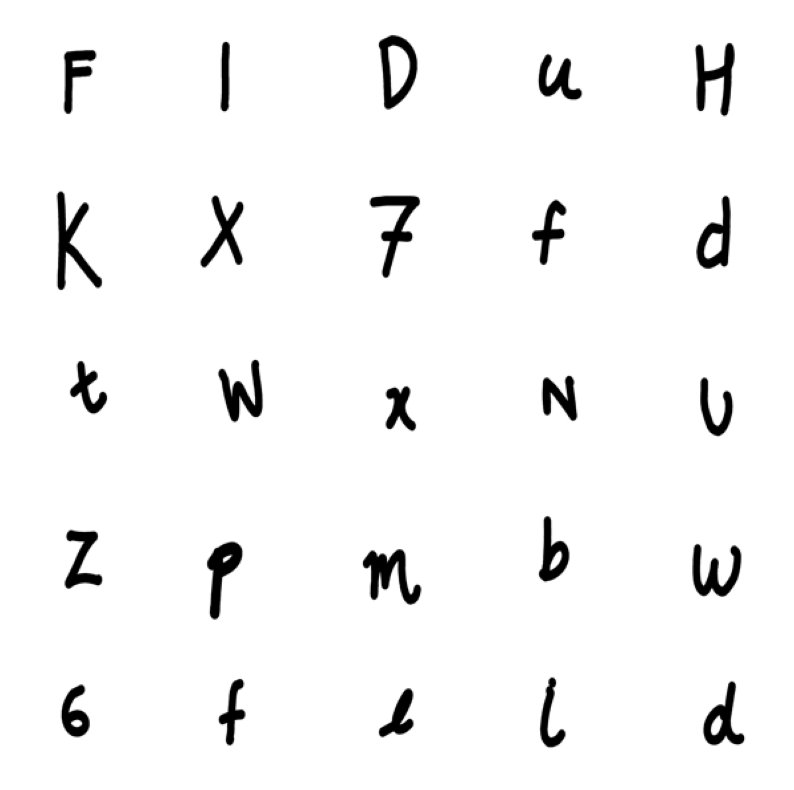

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    random_indice = np.random.randint(3409)
    plt.imshow(x[random_indice], cmap='gray')
    plt.axis('off')
plt.show()

Exploratory Data Analysis.

Split the data into training, testing and validation sets

CNN Model

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, df,test_size=0.3, random_state=42)
print("x_train Dataset shape:", x_train.shape)
print("y_train shape:", len(y_train))
print("x_test shape:", x_test.shape)
print("y_test shape:", len(y_test))

x_train Dataset shape: (2387, 100, 100, 3)
y_train shape: 2387
x_test shape: (1023, 100, 100, 3)
y_test shape: 1023


In [7]:
y_train_array = y_train.to_numpy()
y_test_array = y_test.to_numpy()
y_train_indices = np.argmax(y_train_array, axis=1)
y_test_indices = np.argmax(y_test_array, axis=1)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_indices)
y_test_encoded = label_encoder.transform(y_test_indices)

In [8]:
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(100, 100, 3)),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(256, activation='relu'),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(62, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(lr=.01),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train_encoded, epochs=20,
validation_data=(x_test, y_test_encoded))

Epoch 1/20
75/75 [==============================] - 37s 462ms/step - loss: 4.6155 - accuracy: 0.5811 - val_loss: 0.6021 - val_accuracy: 0.6696
Epoch 2/20
75/75 [==============================] - 36s 479ms/step - loss: 0.6950 - accuracy: 0.6778 - val_loss: 0.5016 - val_accuracy: 0.7419
Epoch 3/20
75/75 [==============================] - 36s 479ms/step - loss: 0.6102 - accuracy: 0.7164 - val_loss: 0.4936 - val_accuracy: 0.7586
Epoch 4/20
75/75 [==============================] - 36s 485ms/step - loss: 0.5646 - accuracy: 0.7361 - val_loss: 0.4700 - val_accuracy: 0.7869
Epoch 5/20
75/75 [==============================] - 36s 480ms/step - loss: 0.4812 - accuracy: 0.7755 - val_loss: 0.4386 - val_accuracy: 0.8074
Epoch 6/20
75/75 [==============================] - 36s 485ms/step - loss: 0.4785 - accuracy: 0.7734 - val_loss: 0.4283 - val_accuracy: 0.7820
Epoch 7/20
75/75 [==============================] - 37s 494ms/step - loss: 0.4051 - accuracy: 0.8132 - val_loss: 0.4032 - val_accuracy: 0.8192

32/32 [==============================] - 5s 140ms/step - loss: 0.5225 - accuracy: 0.8368
testing Accuracy of Neural Network model using keras :0.8367546200752258






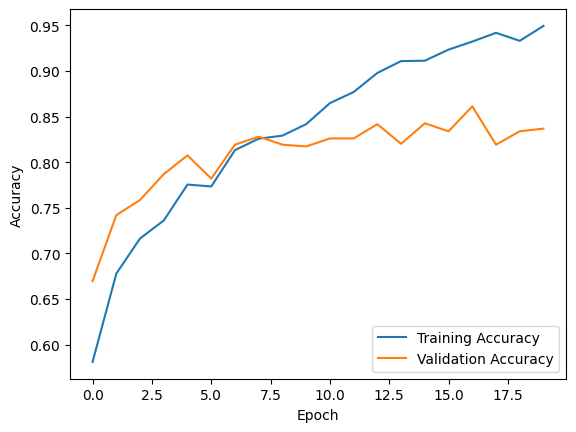

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded)
print(f"testing Accuracy of Neural Network model using keras :{test_accuracy}\n\n\n\n")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

Neural network model Using Single Layer perceptron model

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x1, df,
test_size=0.3, random_state=42)
y_train_array = y_train.to_numpy()
y_test_array = y_test.to_numpy()
y_train_indices = np.argmax(y_train_array, axis=1)
y_test_indices = np.argmax(y_test_array, axis=1)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_indices)
y_test_encoded = label_encoder.transform(y_test_indices)

In [11]:
perceptron_model = Perceptron(max_iter=20, eta0=0.01)
train_accuracies = []
val_accuracies = []
for epoch in range(20):
    perceptron_model.partial_fit(x_train, y_train_encoded,classes = np.unique(y_train_encoded))
    y_train_pred = perceptron_model.predict(x_train)
    train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
    train_accuracies.append(train_accuracy)
    y_val_pred = perceptron_model.predict(x_test)
    val_accuracy = accuracy_score(y_test_encoded, y_val_pred)
    val_accuracies.append(val_accuracy)
    print(f"Epoch {epoch+1}/20 - Training Accuracy:{train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")
y_test_pred = perceptron_model.predict(x_test)

Epoch 1/20 - Training Accuracy:0.6468, Validation Accuracy: 0.6383
Epoch 2/20 - Training Accuracy:0.5765, Validation Accuracy: 0.5758
Epoch 3/20 - Training Accuracy:0.5899, Validation Accuracy: 0.5846
Epoch 4/20 - Training Accuracy:0.6389, Validation Accuracy: 0.6266
Epoch 5/20 - Training Accuracy:0.7080, Validation Accuracy: 0.6735
Epoch 6/20 - Training Accuracy:0.6992, Validation Accuracy: 0.6618
Epoch 7/20 - Training Accuracy:0.7306, Validation Accuracy: 0.6735
Epoch 8/20 - Training Accuracy:0.7411, Validation Accuracy: 0.6921
Epoch 9/20 - Training Accuracy:0.7650, Validation Accuracy: 0.7087
Epoch 10/20 - Training Accuracy:0.7386, Validation Accuracy: 0.6725
Epoch 11/20 - Training Accuracy:0.7361, Validation Accuracy: 0.6745
Epoch 12/20 - Training Accuracy:0.7243, Validation Accuracy: 0.6784
Epoch 13/20 - Training Accuracy:0.7193, Validation Accuracy: 0.6764
Epoch 14/20 - Training Accuracy:0.7076, Validation Accuracy: 0.6686
Epoch 15/20 - Training Accuracy:0.7134, Validation Accura




Testing Accuracy fo Single Layer perceptron model :0.678396871945259





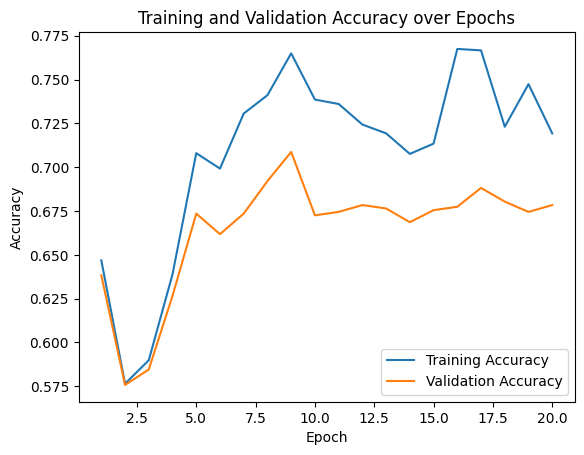

In [12]:
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f"\n\n\nTesting Accuracy fo Single Layer perceptron model :{test_accuracy}\n\n\n")
plt.plot(range(1, 21), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 21), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy over Epochs')
plt.show()

Neural network model Using multiple Layer perceptron model

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x1, df,
test_size=0.3, random_state=42)

y_train_array = y_train.to_numpy()
y_test_array = y_test.to_numpy()
y_train_indices = np.argmax(y_train_array, axis=1)
y_test_indices = np.argmax(y_test_array, axis=1)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_indices)
y_test_encoded = label_encoder.transform(y_test_indices)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=20,
learning_rate_init=0.01)

train_accuracies = []
val_accuracies = []

for epoch in range(20):
    mlp_model.partial_fit(x_train, y_train_encoded, classes=np.unique(y_train_encoded))

    y_train_pred = mlp_model.predict(x_train)

    train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
    train_accuracies.append(train_accuracy)

    y_val_pred = mlp_model.predict(x_test)

    val_accuracy = accuracy_score(y_test_encoded, y_val_pred)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/20 - Training Accuracy:{train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")
y_test_pred = mlp_model.predict(x_test)

Epoch 1/20 - Training Accuracy:0.7038, Validation Accuracy: 0.6696
Epoch 2/20 - Training Accuracy:0.7038, Validation Accuracy: 0.6696
Epoch 3/20 - Training Accuracy:0.7038, Validation Accuracy: 0.6696
Epoch 4/20 - Training Accuracy:0.7038, Validation Accuracy: 0.6696
Epoch 5/20 - Training Accuracy:0.7051, Validation Accuracy: 0.6706
Epoch 6/20 - Training Accuracy:0.7264, Validation Accuracy: 0.6950
Epoch 7/20 - Training Accuracy:0.7210, Validation Accuracy: 0.7165
Epoch 8/20 - Training Accuracy:0.7398, Validation Accuracy: 0.7048
Epoch 9/20 - Training Accuracy:0.7470, Validation Accuracy: 0.7273
Epoch 10/20 - Training Accuracy:0.7398, Validation Accuracy: 0.7077
Epoch 11/20 - Training Accuracy:0.7512, Validation Accuracy: 0.7283
Epoch 12/20 - Training Accuracy:0.7499, Validation Accuracy: 0.7136
Epoch 13/20 - Training Accuracy:0.7537, Validation Accuracy: 0.7214
Epoch 14/20 - Training Accuracy:0.7340, Validation Accuracy: 0.6999
Epoch 15/20 - Training Accuracy:0.7520, Validation Accura

Testing Accuracy fo Multiple Layer perceptron model :0.70772238514174


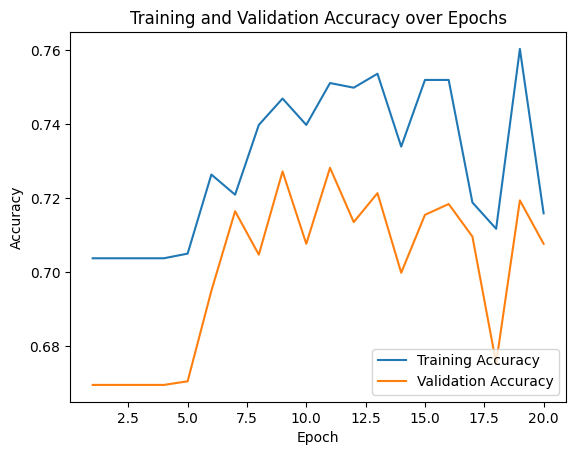

In [17]:
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f"Testing Accuracy fo Multiple Layer perceptron model :{test_accuracy}")
plt.plot(range(1, 21), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 21), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy over Epochs')
plt.show()